<a href="https://colab.research.google.com/github/dhruvingandhi11/gandhidhruvin/blob/master/Task_2_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Score prediction using linear **Regression**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


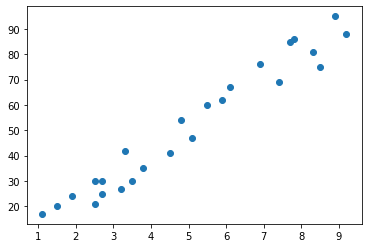

In [ ]:
plt.scatter(df['Hours'], df['Scores'], label = 'percentage scored')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X =np.array(df['Hours']).reshape(-1,1)
Y = np.array(df['Scores'])


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler= StandardScaler()
#X = scaler.fit(X)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y,test_size =0.2)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
m = regressor.coef_
c = regressor.intercept_
print('coeff:' ,m)
print('inter:' ,c)

coeff: [9.59084271]
inter: 3.3425960103352494


<function matplotlib.pyplot.show>

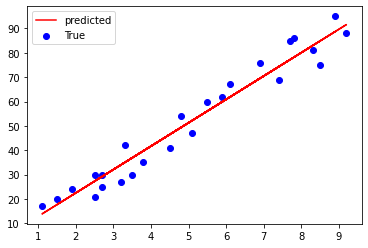

In [ ]:
line = m*X +c
plt.scatter(X,Y,c='b',label ='True')
plt.plot(X,line,c='r', label = 'predicted')
plt.legend(loc='upper left')
plt.show

In [ ]:

y_pred = regressor.predict(x_test)
print(x_test)

[[7.8]
 [3.2]
 [8.3]
 [5.9]
 [2.7]]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'predicted':y_pred})
df

,Actual,predicted
0,86,78.151169
1,27,34.033293
2,81,82.946590
3,62,59.928568
4,30,29.237871


In [ ]:
print("Predicted score if student study for 9.25 hours in a day: ",(regressor.predict([[9.25]]))[0])

Predicted score if student study for 9.25 hours in a day:  92.05789106257325


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9324549437498986
